<h1 id="background">Background</h1>
<p>
Census data used as the motivation for detecting bias for potential use cases such as credit loan applications.  This notebook is a modifed version of the original content from Microsoft's Fairlearn toolkit.  The data set utilized is accessible from UCI, or openml. <br><br>

</p>

In [29]:
headers = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "FiftyK"]

In [30]:
import pandas as pd

# Read source data file
data_file = "adult.data"
df = pd.read_csv(data_file, names = headers)

<h1 id="EDA">Exploratory Data Analysis</h1>
<p>
The data set from UCI is explored for comprehending basic statistics.<br>
</p>

In [31]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,FiftyK
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  FiftyK          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [38]:
df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [39]:
df["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [40]:
df["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [41]:
df["native-country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0.5, 1.0, 'Income')

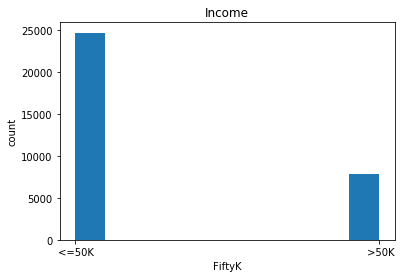

In [48]:
# Plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["FiftyK"])

# set x/y labels and plot title
plt.pyplot.xlabel("FiftyK")
plt.pyplot.ylabel("count")
plt.pyplot.title("Income")

Text(0.5, 1.0, 'age bins')

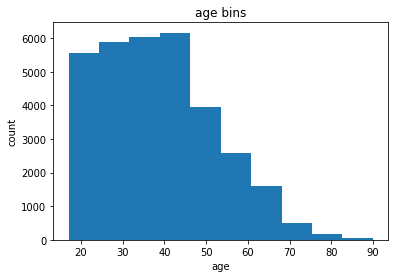

In [49]:
# Plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["age"])

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age bins")

In [43]:
#Descriptive statistics for all objects
df.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,FiftyK
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


<h3 id="Observation">Observations from the Census Data Set</h3>
<p>
The above explorary analysis reveals the following insights. <br><br>

- Twice as more males than females
- Most individuals at least have HS education with some college experience
- Predominant respondents in this data set have the race of white
- Most respondents' native country = USA
    
    
</p>

<h1 id="OpenML">OpenML</h1>
<p>
Using openml fetch same data set.  The below is reproduced from Microsoft's Fairness toolkit quick start example (https://fairlearn.org/main/quickstart.html), with a few modifications: annotations and incorporation within Jupyter notebook.  Also, reference Microsoft & EY's white paper: "Assessing and mitigating unfairness in credit models with the Fairlearn toolkit". <br><br>

</p>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=1590, as_frame=True)
X = pd.get_dummies(data.data)
y_true = (data.target == '>50K') * 1
sex = data.data['sex']
sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [5]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X, y_true)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [6]:
y_pred = classifier.predict(X)
gm = MetricFrame(accuracy_score, y_true, y_pred, sensitive_features=sex)
print(gm.overall)

0.8443552680070431


In [7]:
print(gm.by_group)

sex
Female    0.925148
Male      0.804288
Name: accuracy_score, dtype: object


In [8]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(selection_rate, y_true, y_pred, sensitive_features=sex)
sr.overall

0.16385487899758405

In [9]:
sr.by_group

sex
Female    0.0635499
Male       0.213599
Name: selection_rate, dtype: object

In [18]:
from fairlearn.widget import FairlearnDashboard
FairlearnDashboard(sensitive_features=sex, sensitive_feature_names=['sex'], y_true=y_true, 
y_pred={"initial model": y_pred})

FairlearnWidget(value={'true_y': [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1…

In [14]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
np.random.seed(0)
constraint = DemographicParity()
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(classifier, constraint)
mitigator.fit(X, y_true, sensitive_features=sex)
y_pred_mitigated = mitigator.predict(X)
sr_mitigated = MetricFrame(selection_rate, y_true, y_pred_mitigated, sensitive_features=sex)
print(sr_mitigated.overall)

0.16614798738790384


In [15]:
print(sr_mitigated.by_group)

sex
Female    0.155262
Male      0.171547
Name: selection_rate, dtype: object


In [16]:
FairlearnDashboard(sensitive_features=sex, sensitive_feature_names=['sex'], y_true=y_true, y_pred={"initial model": y_pred, "mitigated model": y_pred_mitigated})

/opt/anaconda3/lib/python3.7/site-packages/fairlearn/widget/_fairlearn_dashboard.py:47: UserWarning: The FairlearnDashboard will move from Fairlearn to the raiwidgets package after the v0.5.0 release. Instead, Fairlearn will provide some of the existing functionality through matplotlib-based visualizations.
  warn("The FairlearnDashboard will move from Fairlearn to the "


FairlearnWidget(value={'true_y': [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1…